<a href="https://colab.research.google.com/github/Above02/Statistical_Analysis/blob/master/Machine_Learning/code/Keras_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>¿Keras y Tensorflow? ¿CNN?</h1>

----

Keras es una API de redes neuronales de alto nivel.

Permite una experimentación rápida a través de una API de alto nivel, fácil de usar, modular y extensible. 

---
Keras también se puede ejecutar tanto en CPU como en GPU.

Platicaremos de los conceptos básicos de Keras, incluidos los dos modelos de Keras más utilizados (Secuencial y Funcional), las capas centrales y algunas funcionalidades de preprocesamiento.

In [1]:
!pip install keras

### Cargando en un conjunto de datos

Keras proporciona siete conjuntos de datos diferentes, que se pueden cargar usando Keras directamente. 

Estos incluyen conjuntos de datos de imágenes, así como un precio de la vivienda y conjuntos de datos de reseñas de películas.

En este pequeño ejercicio, usaremos el conjunto de datos MNIST, que contiene 70000 imágenes en escala de grises de 28x28 con 10 clases diferentes. 

---
Keras lo divide en un conjunto de entrenamiento con 60000 instancias y un conjunto de pruebas con 10000 instancias.

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Para alimentar las imágenes a una red neuronal convolucional, transformamos el dataframe en cuatro dimensiones. Esto se puede hacer usando el método de reshape de Numpy. También transformaremos los datos en flotantes y los normalizaremos.



In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [4]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Creando un modelo con la API secuencial

La forma más sencilla de crear un modelo en Keras es utilizando la API secuencial, que le permite apilar una capa tras otra. 

---
El problema con la API secuencial es que no permite que los modelos tengan múltiples entradas o salidas, que son necesarias para algunos problemas.

Sin embargo, la API secuencial es una elección perfecta para la mayoría de los problemas.

Para crear una red neuronal convolucional solo necesitamos crear un objeto secuencial y usar la función agregar para agregar capas.

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

El código anterior primero crea un objeto secuencial y agrega algunas capas convolucionales, de agrupación máxima y de dropout (descarte). 

---
Luego aplana la salida y le pasa una última capa densa y descarte antes de pasarla a nuestra capa de salida. 

### ¿ Qué es una red neuronal convolucional ?

Las redes neuronales convolucionales son muy similares a las redes neuronales ordinarias: están formadas por neuronas que tienen pesos y bias que se pueden aprender. 

---
Cada neurona recibe algunas entradas, realiza un producto escalar y, opcionalmente, lo sigue con una no linealidad. 


Toda la red todavía expresa una única función de puntuación diferenciable: desde los píxeles de la imagen sin procesar en un extremo hasta las puntuaciones de la clase en el otro. 

Y todavía tienen una función de pérdida (por ejemplo, SVM / Softmax) en la última capa (completamente conectada) y todavía se aplican todos los consejos / trucos que desarrollamos para aprender redes neuronales regulares.


<img src="https://i.pinimg.com/originals/19/41/9c/19419ca47404d8712f5ac4cd26b58c61.png"/>

---

Entonces, ¿qué cambia? Las arquitecturas ConvNet asumen explícitamente que las entradas son imágenes, lo que nos permite codificar ciertas propiedades en la arquitectura. Estos hacen que la función de reenvío sea más eficiente de implementar y reducen enormemente la cantidad de parámetros en la red.

### Capas utilizadas para crear ConvNets

Como describimos anteriormente, una ConvNet simple es una secuencia de capas, y cada capa de una ConvNet transforma un volumen de activaciones en otro a través de una función diferenciable. 

---
Usamos tres tipos principales de capas para construir arquitecturas ConvNet: Capa convolucional, Capa de agrupación y Capa completamente conectada (exactamente como se ve en las redes neuronales normales). Apilaremos estas capas para formar una arquitectura ConvNet completa.

---

### Ejemplo de Arquitectura: descripción general. 

Entraremos en más detalles a continuación, pero una ConvNet simple para la clasificación CIFAR-10 podría tener la arquitectura [INPUT - CONV - RELU - POOL - FC]. 

**Con más detalle:**

* INPUT [32x32x3] mantendrá los valores de píxeles sin procesar de la imagen, en este caso una imagen de ancho 32, alto 32 y con tres canales de color R, G, B.
* CONV layer calculará la salida de las neuronas que están conectadas a regiones locales en la entrada, cada una calculando un producto escalar entre sus pesos y una pequeña región a la que están conectadas en el volumen de entrada. Esto puede resultar en un volumen como [32x32x12] si decidimos usar 12 filtros.
* RELU aplicará una función de activación por elementos, como max (0, x) y umbral en cero. Esto deja el tamaño del volumen sin cambios ([32x32x12]).
* POOL realizará una operación de reducción de resolución a lo largo de las dimensiones espaciales (ancho, alto), dando como resultado un volumen como [16x16x12].
* FC (es decir, completamente conectada) calculará los puntajes de la clase, lo que dará como resultado un volumen de tamaño [1x1x10], donde cada uno de los 10 números corresponde a un puntaje de clase, como entre las 10 categorías de CIFAR-10. Al igual que con las redes neuronales ordinarias y como su nombre lo indica, cada neurona de esta capa se conectará a todos los números del volumen anterior.

<img src="https://cs231n.github.io/assets/cnn/convnet.jpeg"/>

### En resumen:

    Una arquitectura ConvNet es, en el caso más simple, una lista de capas que transforman el volumen de la imagen en un volumen de salida (por ejemplo, manteniendo las puntuaciones de la clase)
    Hay algunos tipos distintos de capas (por ejemplo, CONV / FC / RELU / POOL son, con mucho, los más populares)
    Cada capa acepta un volumen 3D de entrada y lo transforma en un volumen 3D de salida a través de una función diferenciable 

Nota: para mejor detalle, consultar el siguiente [link](https://cs231n.github.io/convolutional-networks/)



<h1><center>¿Qúe es una CNN? ¿Cómo puede ver una red neuronal? ¿Cómo clasifica imagenes y distingue un perro de un gato?</center></h1>

La CNN es un tipo de Red Neuronal Artificial con aprendizaje supervisado que procesa sus capas imitando al cortex visual del ojo humano para identificar distintas características en las entradas que en definitiva hacen que pueda identificar objetos y “ver”. 

Para ello, la CNN contiene varias capas ocultas especializadas y con una jerarquía: esto quiere decir que las primeras capas pueden detectar lineas, curvas y se van especializando hasta llegar a capas más profundas que reconocen formas complejas como un rostro o la silueta de un animal.

---

Recodemos que la red neuronal deberá aprender por sí sola a reconocer una diversidad de objetos dentro de imágenes y para ello necesitaremos una gran cantidad de imágenes -lease más de 10.000 imágenes de gatos, otras 10.000 de perros,…- para que la red pueda captar sus características únicas -de cada objeto- y a su vez, poder generalizarlo -esto es que pueda reconocer como gato tanto a un felino negro, uno blanco, un gato de frente, un gato de perfil, gato saltando, etc.-

<img src="https://i0.wp.com/www.aprendemachinelearning.com/wp-content/uploads/2018/11/cnn-01.png?resize=768%2C434&ssl=1"/>

---

### Pixeles y neuronas

Para comenzar, la red toma como entrada los pixeles de una imagen. Si tenemos una imagen con apenas 28×28 pixeles de alto y ancho, eso equivale a  784 neuronas. Y eso es si sólo tenemos 1 color (escala de grises). Si tuviéramos una imagen a color, necesitaríamos 3 canales (red, green, blue) y entonces usaríamos 28x28x3 = 2352 neuronas de entrada. Esa es nuestra capa de entrada. Para continuar con el ejemplo, supondremos que utilizamos la imagen con 1 sólo color.


---

<img src="https://i0.wp.com/www.aprendemachinelearning.com/wp-content/uploads/2018/11/cnn-02.png?resize=768%2C567&ssl=1"/>

### Pre-procesamiento

Antes de alimentar la red, recuerda que como entrada nos conviene normalizar los valores. Los colores de los pixeles tienen valores que van de 0 a 255, haremos una transformación de cada pixel: “valor/255” y nos quedará siempre un valor entre 0 y 1.

---

### Convoluciones

Ahora comienza el “procesado distintivo” de las CNN. 

Es decir, haremos las llamadas “convoluciones”: Estas consisten en tomar “grupos de pixeles cercanos” de la imagen de entrada e ir operando matemáticamente (producto escalar) contra una pequeña matriz que se llama kernel. 

<img src="https://i1.wp.com/www.aprendemachinelearning.com/wp-content/uploads/2018/11/cnn-03.png?resize=300%2C219&ssl=1"/>

Ese kernel supongamos de tamaño 3×3 pixels “recorre” todas las neuronas de entrada (de izquierda-derecha, de arriba-abajo) y genera una nueva matriz de salida, que en definitiva será nuestra nueva capa de neuronas ocultas. 

* NOTA: si la imagen fuera a color, el kernel realmente sería de 3x3x3 es decir: un filtro con 3 kernels de 3×3; luego  esos 3 filtros se suman (y se le suma una unidad bias) y conformarán 1 salida (cómo si fuera 1 solo canal).

--------

### Filtro: conjunto de kernels

<img src="https://i2.wp.com/www.aprendemachinelearning.com/wp-content/uploads/2018/11/cnn_kernel.gif?resize=406%2C134"/>

A medida que vamos desplazando el kernel y vamos obteniendo una “nueva imagen” filtrada por el kernel. En esta primer convolución y siguiendo con el ejemplo anterior, es como si obtuviéramos 32 “imágenes filtradas nuevas”. Estas imágenes nuevas lo que están “dibujando” son ciertas características de la imagen original. Esto ayudará en el futuro a poder distinguir un objeto de otro (por ej. gato ó perro).

<img src="https://i2.wp.com/www.aprendemachinelearning.com/wp-content/uploads/2018/11/CNN-04.png?resize=768%2C355&ssl=1"/>

---

### La función de Activación

La más utilizada para este tipo de redes neuronales es la llamada ReLu por Rectifier Linear Unit  y consiste en $f(x)=max(0,x)$.

---

### Subsampling

Ahora viene un paso en el que reduciremos la cantidad de neuronas antes de hacer una nueva convolución. 

**¿Por qué?** 

Como vimos, a partir de nuestra imagen blanco y negro de 28x28px tenemos una primer capa de entrada de 784 neuronas y luego de la primer convolución obtenemos una capa oculta de 25.088 neuronas -que realmente son nuestros 32 mapas de características de 28×28-

Si hiciéramos una nueva convolución a partir de esta capa, el número de neuronas de la próxima capa se iría por las nubes (y ello implica mayor procesamiento)! 

---
Para reducir el tamaño de la próxima capa de neuronas haremos un proceso de **subsampling** en el que reduciremos el tamaño de nuestras imágenes filtradas pero en donde deberán prevalecer las características más importantes que detectó cada filtro.

<img src="https://i1.wp.com/www.aprendemachinelearning.com/wp-content/uploads/2018/11/cnn-05.png?resize=300%2C233&ssl=1"/>

### Subsampling con Max-Pooling

Vamos a intentar explicarlo con un ejemplo: supongamos que haremos Max-pooling de tamaño 2×2. Esto quiere decir que recorreremos cada una de nuestras 32 imágenes de características obtenidas anteriormente de 28x28px de izquierda-derecha, arriba-abajo.... 

PERO en vez de tomar de a 1 pixel, tomaremos de “2×2” (2 de alto por 2 de ancho = 4 pixeles) e iremos preservando el valor “más alto” de entre esos 4 pixeles (por eso lo de “Max”). En este caso, usando 2×2, la imagen resultante es reducida “a la mitad”y quedará de 14×14 pixeles. Luego de este proceso de subsamplig nos quedarán  32 imágenes de 14×14, pasando de haber tenido 25.088 neuronas a  6272, son bastantes menos y -en teoría- siguen almacenando la información más importante para detectar características deseadas.

---
---

### Primera convolución

<img src="https://i2.wp.com/www.aprendemachinelearning.com/wp-content/uploads/2018/11/cnn-06.png?resize=768%2C576&ssl=1"/>

Primer convolución: consiste de una entrada, un conjunto de filtros, generamos un mapa de características y hacemos un subsampling. Con lo cual, en el ejemplo de imágenes de 1 sólo color tendremos lo de la imagen anterior... y sería

* Entrada: 28x28x1
* Kernel: 32 filtros de 3x3
* Feature Mapping: 28x28x32
* Max-Pooling: 2x2
* Salida: 14x14x32

---

La primer convolución es capaz de detectar características primitivas como lineas ó curvas. A medida que hagamos más capas con las convoluciones, los mapas de características serán capaces de reconocer formas más complejas, y el conjunto total de capas de convoluciones podrá “ver”.

#### Pues ahora deberemos hacer una Segunda convolución que será:

<img src="https://i0.wp.com/www.aprendemachinelearning.com/wp-content/uploads/2018/11/cnn-07.png?resize=768%2C576&ssl=1"/>

* Entrada: 14x14x32
* Kernel: 64 filtros de 3x3
* Feature Mapping: 14x14x64
* Max-Pooling: 2x2
* Salida: 7x7x64

---

La 3er convolución comenzará en tamaño 7×7 pixels y luego del max-pooling quedará en 3×3 con lo cual podríamos hacer sólo 1 convolución más. En este ejemplo empezamos con una imagen de 28x28px e hicimos 3 convoluciones. Si la imagen inicial hubiese sido mayor (de 224x224px) aún hubiéramos podido seguir haciendo convoluciones.

* Entrada: 7x7x32
* Kernel: 128 filtros de 3x3
* Feature Mapping: 7x7x64
* Max-Pooling: 2x2
* Salida: 3x3x128

---
---

### Conectar con una red neuronal “tradicional”

Para terminar, tomaremos la última capa oculta a la que hicimos subsampling, que se dice que es “tridimensional” por tomar la forma -en nuestro ejemplo- 3x3x128 (alto,ancho,mapas) y la “aplanamos”, esto es que deja de ser tridimensional, y pasa a ser una capa de neuronas “tradicionales”, de las que ya conocíamos. Por ejemplo, podríamos aplanar (y conectar) a una nueva capa oculta de 100 neuronas feedforward.

<img src="https://i0.wp.com/www.aprendemachinelearning.com/wp-content/uploads/2018/11/CNN-08.png?resize=768%2C459&ssl=1"/>

Entonces, a esta nueva capa oculta “tradicional”, le aplicamos una función llamada **Softmax** que conecta contra la capa de salida final que tendrá la cantidad de neuronas correspondientes con las clases que estamos clasificando.

Si clasificamos perros y gatos, serán 2 neuronas. Si es el dataset **Mnist** serán 10 neuronas de salida. Si clasificamos coches, aviones ó barcos serán 3, etc.

Las salidas al momento del entrenamiento tendrán el formato conocido como “one-hot-encoding” en el que para perros y gatos sera: [1,0] y [0,1], para coches, aviones ó barcos será [1,0,0]; [0,1,0];[0,0,1].

Y la función de Softmax se encarga de pasar a probabilidad (entre 0 y 1) a las neuronas de salida. Por ejemplo una salida [0,2 0,8] nos indica 20% probabilidades de que sea perro y 80% de que sea gato.

---
---
---

### ¿Y cómo aprendió la CNN a “ver”?: Backpropagation

El proceso es similar al de las redes tradicionales en las que tenemos una entrada y una salida esperada (por eso **aprendizaje supervisado**) y mediante el backpropagation mejoramos el valor de los pesos de las interconexiones entre capas de neuronas y a medida que iteramos esos pesos se ajustan hasta ser óptimos. **PERO…**

En el caso de las CNN, deberemos ajustar el valor de los pesos de los distintos kernels. Esto es una gran ventaja al momento del aprendizaje pues como vimos cada kernel es de un tamaño reducido, en nuestro ejemplo en la primer convolución es de tamaño de 3×3, eso son sólo 9 parámetros que debemos ajustar en 32 filtros dan un total de 288 parámetros. 

En comparación con los pesos entre dos capas de neuronas “tradicionales”: una de 748 y otra de  6272 en donde están TODAS interconectarlas con TODAS y eso equivaldría a tener que entrenar y ajustar más de 4,5 millones de pesos (repito: sólo para 1 capa).


---
---
---

### Arquitectura básica

Resumiendo: podemos decir que los elementos que usamos para crear CNNs son:

* Entrada: Serán los pixeles de la imagen. Serán alto, ancho y profundidad será 1 sólo color o 3 para Red,Green,Blue.
* Capa De Convolución: procesará la salida de neuronas que están conectadas en “regiones locales” de entrada (es decir pixeles cercanos), calculando el producto escalar entre sus pesos (valor de pixel) y una pequeña región a la que están conectados en el volumen de entrada. Aquí usaremos por ejemplo 32 filtros o la cantidad que decidamos y ese será el volumen de salida.
* “CAPA RELU” aplicará la función de activación en los elementos de la matriz.
* POOL ó SUBSAMPLING: Hará una reducción en las dimensiones alto y ancho, pero se mantiene la profundidad.
* CAPA “TRADICIONAL” red de neuronas feedforward que conectará con la última capa de subsampling y finalizará con la cantidad de neuronas que queremos clasificar.


Regresando con Keras, también se puede construir el modelo de la siguiente manera:

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential([
    Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]),
    Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(rate=0.5),
    Dense(10, activation='softmax')
])

### Creando un modelo con la API

Alternativamente, la API le permite crear los mismos modelos pero le ofrece más flexibilidad a costa de simplicidad y legibilidad.

Se puede utilizar con múltiples capas de entrada y salida, así como con capas compartidas, lo que le permite construir estructuras de red realmente complejas.

In [7]:
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input

inputs = Input(shape=x_train.shape[1:])

x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(inputs)
x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)

x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)

### Compilar un modelo

Antes de que podamos comenzar a entrenar nuestro modelo, debemos configurar el proceso de aprendizaje. Para esto, necesitamos especificar un optimizador, una función de pérdida y opcionalmente algunas métricas como la precisión.

La función de pérdida es una medida de qué tan bueno es nuestro modelo para lograr el objetivo dado.

Se usa un optimizador para minimizar la función de pérdida (objetivo) actualizando los pesos usando los gradientes.

In [8]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

### Aumento de datos de imagen

El aumento es un proceso de creación de más datos a partir de existentes. Para las imágenes, puede realizar pequeñas transformaciones como rotar la imagen, hacer zoom en la imagen, agregar ruido y muchas más.

Esto ayuda a que el modelo sea más robusto y resuelve el problema de no tener suficientes datos. Keras tiene un método llamado ImageDataGenerator que puede usarse para aumentar imágenes.

In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
  rotation_range=10,
  zoom_range=0.1,
  width_shift_range=0.1,
  height_shift_range=0.1
)

Este ImageDataGenerator creará nuevas imágenes que se rotaron, acercaron o alejaron y se cambiaron de ancho y alto.

---

### Ajustar un modelo

Ahora que definimos y compilamos nuestro modelo, estamos listos para el entrenamiento. 

---
Para entrenar un modelo, normalmente usaríamos el método de ajuste, pero debido a que estamos usando un generador de datos, usaremos fit_generator y le pasaremos nuestro generador, datos X, datos y, así como el número de épocas y el tamaño del lote.

---
También le pasaremos un conjunto de validación para que podamos monitorear la pérdida y la precisión en ambos conjuntos, así como también en steps_per_epoch, que se requiere cuando se usa un generador y simplemente se establece en la longitud del conjunto de entrenamiento dividido por batch_size.

In [10]:
epochs = 3
batch_size = 32
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs,
                              validation_data=(x_test, y_test), steps_per_epoch=x_train.shape[0]//batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/3
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3287 - accuracy: 0.8964 - val_loss: 0.0373 - val_accuracy: 0.9878
Epoch 2/3
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1142 - accuracy: 0.9670 - val_loss: 0.0267 - val_accuracy: 0.9903
Epoch 3/3
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0882 - accuracy: 0.9751 - val_loss: 0.0296 - val_accuracy: 0.9907


### Visualizando el proceso de entrenamiento

Podemos visualizar nuestra precisión y pérdida de entrenamiento y prueba para cada época para que podamos tener una intuición sobre el rendimiento de nuestro modelo. 

---
La precisión y la pérdida a lo largo de las épocas se guardan en la variable de historial que obtuvimos durante el entrenamiento y usaremos Matplotlib para visualizar estos datos.

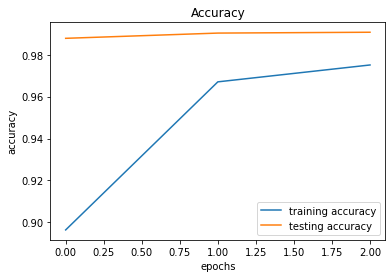

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='testing accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

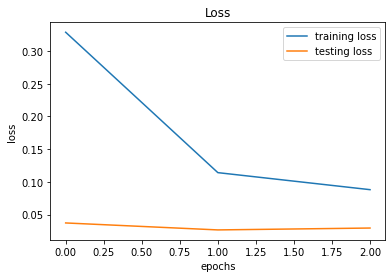

In [12]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='testing loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

### Transferir el aprendizaje en Keras con modelos de visión por computadora

---

Los modelos de redes neuronales profundas pueden tardar días o incluso semanas en entrenarse en conjuntos de datos muy grandes.

Una forma de acortar este proceso es reutilizar los pesos del modelo de modelos previamente entrenados que se desarrollaron para conjuntos de datos de referencia de visión por computadora estándar, como las tareas de reconocimiento de imágenes de ImageNet. Los modelos de alto rendimiento se pueden descargar y utilizar directamente, o integrar en un nuevo modelo para sus propios problemas de visión por computadora.

### ¿Qué es el aprendizaje por transferencia?

El aprendizaje por transferencia generalmente se refiere a un proceso en el que un modelo entrenado en un problema se usa de alguna manera en un segundo problema relacionado.

En el aprendizaje profundo, el aprendizaje por transferencia es una técnica mediante la cual un modelo de red neuronal se entrena primero en un problema similar al problema que se está resolviendo. Luego, una o más capas del modelo entrenado se utilizan en un nuevo modelo entrenado en el problema de interés.

---

El aprendizaje de transferencia tiene la ventaja de disminuir el tiempo de entrenamiento para un modelo de red neuronal y puede resultar en un menor error de generalización.

---
---

### Cómo utilizar modelos previamente entrenados

El uso de un modelo previamente entrenado está limitado solo por tu creatividad....

Por ejemplo, un modelo puede descargarse y usarse tal cual, como incrustado en una aplicación y usado para clasificar nuevas fotografías.

Alternativamente, los modelos se pueden descargar y usar como modelos de extracción de características. Aquí, la salida del modelo de una capa anterior a la capa de salida del modelo se utiliza como entrada para un nuevo modelo clasificador.

Recuerda que las capas convolucionales más cercanas a la capa de entrada del modelo aprenden características de bajo nivel como líneas, que las capas en el medio de la capa aprenden características abstractas complejas que combinan las características de nivel inferior extraídas de la entrada y capas más cercanas a la salida. interpretar las características extraídas en el contexto de una tarea de clasificación.

Con esta comprensión, se puede elegir un nivel de detalle para la extracción de características de un modelo existente previamente entrenado. 

Por ejemplo, si una nueva tarea es bastante diferente de clasificar objetos en fotografías (por ejemplo, diferente a ImageNet), entonces quizás la salida del modelo previamente entrenado después de las pocas capas sería apropiada. Si una nueva tarea es bastante similar a la tarea de clasificar objetos en fotografías, entonces quizás se pueda usar la salida de capas mucho más profundas en el modelo, o incluso la salida de la capa completamente conectada antes de la capa de salida.

----

El modelo previamente entrenado se puede utilizar como un programa de extracción de características independiente, en cuyo caso la entrada puede ser procesada previamente por el modelo o parte del modelo a una salida dada (por ejemplo, vector de números) para cada imagen de entrada, que puede luego utilícelo como entrada al entrenar un nuevo modelo.

Alternativamente, el modelo previamente entrenado o la parte deseada del modelo se puede integrar directamente en un nuevo modelo de red neuronal. En este caso, los pesos de los preentrenados se pueden congelar para que no se actualicen a medida que se entrena el nuevo modelo. Alternativamente, los pesos pueden actualizarse durante el entrenamiento del nuevo modelo, quizás con una tasa de aprendizaje más baja, lo que permite que el modelo preentrenado actúe como un esquema de inicialización de pesos al entrenar el nuevo modelo.

---

### Modelos para la transferencia de aprendizaje

Quizás haya una docena o más de [modelos](https://keras.io/api/applications/) de alto rendimiento para el reconocimiento de imágenes que se pueden descargar y utilizar como base para el reconocimiento de imágenes y las tareas relacionadas con la visión por computadora.

Quizás tres de los modelos más populares son los siguientes:

    VGG (por ejemplo, VGG16 o VGG19).
    GoogLeNet (por ejemplo, InceptionV3).
    Red residual (por ejemplo, ResNet50).






In [2]:
# example of using a pre-trained model as a classifier
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# load an image from file
image = load_img('/content/drive/MyDrive/Colab Notebooks/Datasets/dog.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load the model
model = VGG16()
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

40960/35363 [==================================] - 0s 0us/step
Doberman (33.59%)


### Modelo previamente entrenado como preprocesador de extracción de características

El modelo previamente entrenado se puede utilizar como un programa independiente para extraer características de nuevas fotografías.

Específicamente, las características extraídas de una fotografía pueden ser un vector de números que el modelo utilizará para describir las características específicas de una fotografía. Luego, estas características se pueden utilizar como entrada en el desarrollo de un nuevo modelo.

Las últimas capas del modelo VGG16 son capas completamente conectadas antes de la capa de salida. Estas capas proporcionarán un conjunto complejo de características para describir una imagen de entrada determinada y pueden proporcionar información útil al entrenar un nuevo modelo para la clasificación de imágenes o una tarea relacionada con la visión por computadora.

La imagen se puede cargar y preparar para el modelo, como hicimos antes en el ejemplo anterior.

Cargaremos el modelo con la parte de salida del clasificador del modelo, pero eliminaremos manualmente la capa de salida final. Esto significa que la penúltima capa completamente conectada con 4096 nodos será la nueva capa de salida.

In [3]:
# example of using the vgg16 model as a feature extraction model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model
from pickle import dump
# load an image from file
image = load_img('/content/drive/MyDrive/Colab Notebooks/Datasets/dog.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
# get extracted features
features = model.predict(image)
print(features.shape)
# save to file
dump(features, open('dog.pkl', 'wb'))

(1, 4096)


Al ejecutar el ejemplo, se carga la fotografía y luego se prepara el modelo como modelo de extracción de características.

Las características se extraen de la foto cargada y se imprime la forma del vector de características, lo que muestra que tiene 4096 números. Esta característica luego se guarda en un nuevo archivo dog.pkl en el directorio de trabajo actual.

---

### Modelo previamente entrenado como extractor de características en el modelo

Podemos usar algunas o todas las capas en un modelo previamente entrenado como un componente de extracción de características de un nuevo modelo directamente.

Esto se puede lograr cargando el modelo y luego simplemente agregando nuevas capas. Esto puede implicar agregar nuevas capas convolucionales y agrupadas para expandir las capacidades de extracción de características del modelo o agregar nuevas capas de tipo de clasificador completamente conectadas para aprender cómo interpretar las características extraídas en un nuevo conjunto de datos o alguna combinación.



In [5]:
# example of tending the vgg16 model
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
# load model without classifier layers
model = VGG16(include_top=False, input_shape=(300, 300, 3))
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()
# ...

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)      

Un buen ejempllo de cómo mejorar el desempeño lo podemos leer [aquí](https://machinelearningmastery.com/how-to-improve-performance-with-transfer-learning-for-deep-learning-neural-networks/)
